In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate some random data
np.random.seed(0)  # For reproducibility
data = np.random.normal(loc=5, scale=2, size=1000)

# Fit a probability distribution (Gaussian distribution) to the data
mu, std = norm.fit(data)

# Create a range of values for the x-axis
x = np.linspace(data.min(), data.max(), 100)

# Calculate the probability density function (PDF) for the fitted Gaussian distribution
pdf = norm.pdf(x, mu, std)

# Plot the data and the fitted distribution
plt.figure(figsize=(10, 5))
plt.hist(data, bins=20, density=True, alpha=0.6, color='b', label='Data')
plt.plot(x, pdf, 'r-', lw=2, label='Fitted Gaussian Distribution')
plt.title('Probability Distribution Prediction')
plt.xlabel('Value')
plt.ylabel('Probability')
plt.legend()
plt.show()


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_pinball_loss
from sklearn.model_selection import train_test_split

# Sample data creation (replace this with your actual data loading)
np.random.seed(42)
df = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'DepDelay': np.random.randn(100)
})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['feature1', 'feature2']], df['DepDelay'], test_size=0.2, random_state=42)

# Add a constant term for the intercept
X_train = sm.add_constant(X_train)

# Fit quantile regression model for the 0.5 quantile (median)
quant_reg = sm.QuantReg(y_train, X_train)
quant_reg_results = quant_reg.fit(q=0.5)

# Display the summary of the quantile regression
print(quant_reg_results.summary())

# Predict on the test set
X_test = sm.add_constant(X_test)
quantile_predictions = quant_reg_results.predict(X_test)

# Calculate Pinball Loss (a quantile regression metric)
pinball_loss = mean_pinball_loss(y_test, quantile_predictions)
print(f"Pinball Loss: {pinball_loss}")

                         QuantReg Regression Results                          
Dep. Variable:               DepDelay   Pseudo R-squared:              0.01424
Model:                       QuantReg   Bandwidth:                       1.250
Method:                 Least Squares   Sparsity:                        2.991
Date:                Wed, 15 Nov 2023   No. Observations:                   80
Time:                        11:08:54   Df Residuals:                       77
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2546      0.169      1.510      0.135      -0.081       0.590
feature1       0.2381      0.182      1.311      0.194      -0.123       0.600
feature2      -0.0613      0.178     -0.345      0.731      -0.415       0.292
Pinball Loss: 0.3132193180728635


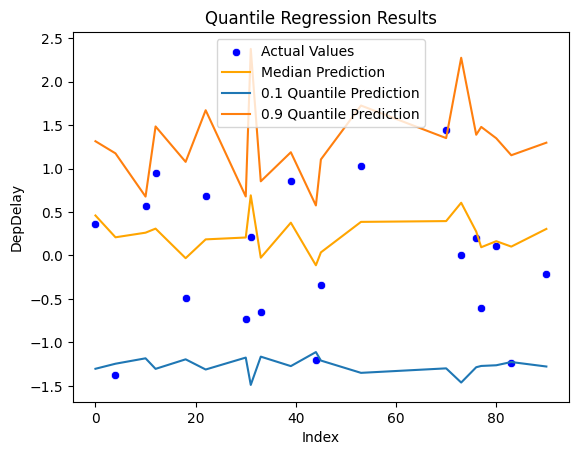

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the actual values
sns.scatterplot(x=y_test.index, y=y_test, label='Actual Values', color='blue')

# Plotting the predicted median
sns.lineplot(x=y_test.index, y=quantile_predictions, label='Median Prediction', color='orange')

# Plotting additional quantiles (e.g., 0.1 and 0.9)
quantiles_to_plot = [0.1, 0.9]
for quantile in quantiles_to_plot:
    # Fit quantile regression model
    quant_reg = sm.QuantReg(y_train, X_train)
    quant_reg_results = quant_reg.fit(q=quantile)
    
    # Predict on the test set
    quantile_predictions = quant_reg_results.predict(X_test)
    
    # Plot the predicted quantile
    sns.lineplot(x=y_test.index, y=quantile_predictions, label=f'{quantile} Quantile Prediction')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('DepDelay')
plt.title('Quantile Regression Results')

# Show legend
plt.legend()

# Show the plot
plt.show()


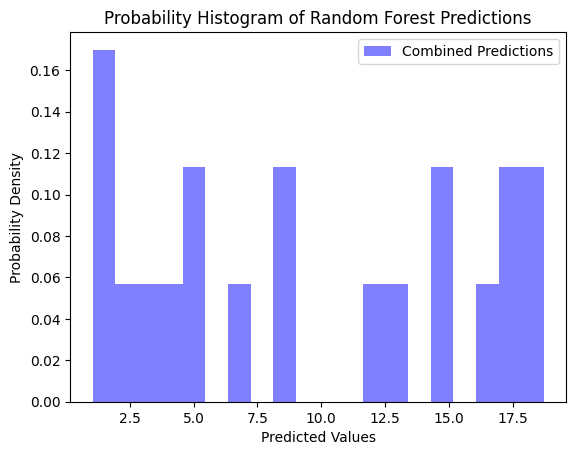

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Sample data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.flatten() + np.random.randn(100)  # Some linear relationship with noise

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get predictions from individual trees
tree_predictions = np.stack([tree.predict(X_test) for tree in rf_model.estimators_])

# Combine predictions (mean for regression)
combined_predictions = np.mean(tree_predictions, axis=0)

# Plot a histogram of the combined predictions
plt.hist(combined_predictions, bins=20, density=True, alpha=0.5, color='blue', label='Combined Predictions')
plt.xlabel('Predicted Values')
plt.ylabel('Probability Density')
plt.title('Probability Histogram of Random Forest Predictions')
plt.legend()
plt.show()
